# Submission Klasifikasi Gambar

## Data Diri
### Nama: Kholisoh Nur Sinta
### e-mail: kholisohns16@gmail.com
### LinkedIn: [Kholisoh Nur Sinta](https://www.linkedin.com/in/kholisohns)

In [10]:
# Mengimport Library yang digunakan
import tensorflow as tf
import zipfile,os,shutil
import numpy as np
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Download dataset dari website
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip\
  -O /tmp/rockpaperscissors.zip

In [6]:
# Melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [13]:
# Callback: mencegah overfitting dan menghentikan training setelah akurasi terpenuhi
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAkurasi melewati 97%, hentikan proses training!")
      self.model.stop_training = True

callbacks = myCallback()

In [12]:
# Split dataset kemudian membuat direktori
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

roc_dir = os.path.join(base_dir,'rock')
pap_dir = os.path.join(base_dir, 'paper')
sci_dir = os.path.join(base_dir, 'scissors')

In [14]:
# Membuat direktori train dan validation
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [15]:
# Membuat path direktori data train untuk setiap kategori image
train_roc = os.path.join(train_dir, 'rock')
train_pap = os.path.join(train_dir, 'paper')
train_sci = os.path.join(train_dir, 'scissors')

# Membuat path direktori data validation untuk setiap kategori image
val_roc = os.path.join(validation_dir, 'rock')
val_pap = os.path.join(validation_dir, 'paper')
val_sci = os.path.join(validation_dir, 'scissors')

In [16]:
# Membuat direktori train untuk setiap kategori image
os.mkdir(train_roc)
os.mkdir(train_pap)
os.mkdir(train_sci)

# Membuat direktori validation untuk setiap kategori image
os.mkdir(val_roc)
os.mkdir(val_pap)
os.mkdir(val_sci)

In [17]:
# Train dan test split
# Membagi data menjadi data train dan data validasi (validation 40% of dataset)
train_roc_dir, val_roc_dir = train_test_split(os.listdir(roc_dir), test_size = 0.40)
train_pap_dir, val_pap_dir = train_test_split(os.listdir(pap_dir), test_size = 0.40)
train_sci_dir, val_sci_dir = train_test_split(os.listdir(sci_dir), test_size = 0.40)

In [18]:
# Mengcopy data train dari direktori asal ke direktori train masing-masing kategori
for file in train_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(train_roc, file))
for file in train_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(train_pap,file))
for file in train_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(train_sci,file))

# Mengcopy data validation dari direktori asal ke direktori validation masing-masing kategori
for file in val_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(val_roc,file))
for file in val_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(val_pap,file))
for file in val_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(val_sci,file))

In [19]:
# Augmentation and generate image data
# Data train
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)

#Data test
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [20]:
# Membuat generator data untuk data train
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical'
)

# Membuat generator data untuk data validation
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [21]:
# Membuat model Sequential
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

# Menampilkan ringkasan arsitektur model
model.summary()

# Mengkompilasi model dengan loss function categorical_crossentropy, optimizer Adam, dan metrik akurasi
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [22]:
# Melatih model menggunakan data dari train_generator
history = model.fit(
    train_generator,
    steps_per_epoch = 41, # 1312 images = batch_size * steps
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 27, # 876 images = batch_size * steps
    verbose =2,
      callbacks=[callbacks]
)

Epoch 1/20
41/41 - 74s - loss: 1.0170 - accuracy: 0.5213 - val_loss: 0.8017 - val_accuracy: 0.6458 - 74s/epoch - 2s/step
Epoch 2/20
41/41 - 61s - loss: 0.5983 - accuracy: 0.7652 - val_loss: 0.4554 - val_accuracy: 0.8345 - 61s/epoch - 1s/step
Epoch 3/20
41/41 - 59s - loss: 0.2920 - accuracy: 0.9040 - val_loss: 0.2859 - val_accuracy: 0.8924 - 59s/epoch - 1s/step
Epoch 4/20
41/41 - 72s - loss: 0.2520 - accuracy: 0.9078 - val_loss: 0.2320 - val_accuracy: 0.9225 - 72s/epoch - 2s/step
Epoch 5/20
41/41 - 72s - loss: 0.1861 - accuracy: 0.9345 - val_loss: 0.1568 - val_accuracy: 0.9525 - 72s/epoch - 2s/step
Epoch 6/20
41/41 - 62s - loss: 0.1226 - accuracy: 0.9550 - val_loss: 0.1053 - val_accuracy: 0.9606 - 62s/epoch - 2s/step
Epoch 7/20
41/41 - 74s - loss: 0.1090 - accuracy: 0.9619 - val_loss: 0.1053 - val_accuracy: 0.9653 - 74s/epoch - 2s/step
Epoch 8/20

Akurasi melewati 97%, hentikan proses training!
41/41 - 61s - loss: 0.0819 - accuracy: 0.9764 - val_loss: 0.2484 - val_accuracy: 0.9259 - 61s

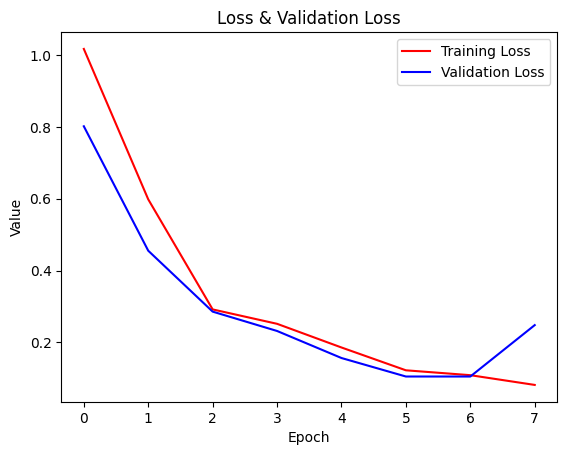

In [24]:
# plot loss train & validation
plt.plot(history.history['loss'], 'r', label='Training Loss')
plt.plot(history.history['val_loss'], 'b', label='Validation Loss')

plt.title('Loss & Validation Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")

plt.show()

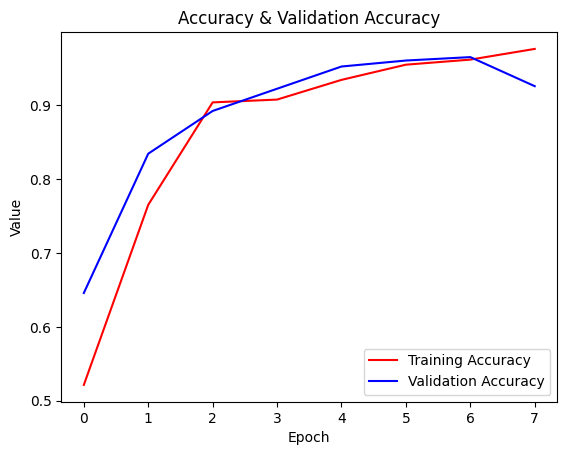

In [23]:
# plot accuracy train & validation
plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')

plt.title('Accuracy & Validation Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")

plt.show()

Saving WhatsApp Image 2023-12-31 at 23.31.11.jpeg to WhatsApp Image 2023-12-31 at 23.31.11.jpeg
1/1 [==============================] - 0s 110ms/step


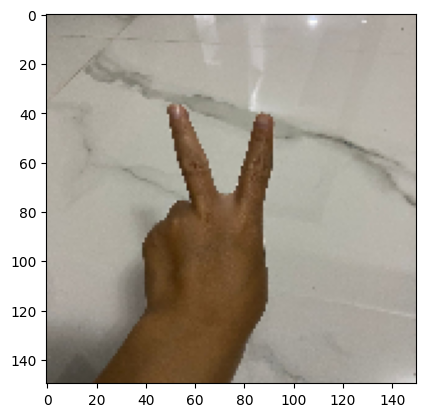

In [25]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Mengunggah gambar dari perangkat lokal ke Colab
uploaded = files.upload()

# Memproses setiap gambar yang diunggah
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  # Memproses gambar dengan model yang telah dilatih
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

In [28]:
# Menampilkan nama file gambar yang sedang diproses
print(fn)

# Memeriksa hasil prediksi berdasarkan kelas yang diberikan oleh model
if classes[0, 0] != 0:
    print('Gunting')
elif classes[0, 1] != 0:
    print('Batu')
else:
    print('Kertas')

WhatsApp Image 2023-12-31 at 23.31.11.jpeg
Gunting
